# Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/Shareddrives/DataMiningProject'

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import math

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing, metrics 
from sklearn.metrics import roc_auc_score, accuracy_score, average_precision_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.optimize import minimize

In [ ]:
cd /content/drive/Shareddrives/DataMiningProject

/content/drive/Shareddrives/DataMiningProject


# Data Loading

In [ ]:
train = pd.read_csv('datasets/train.csv')
val = pd.read_csv('datasets/dev.csv')
# test = pd.read_csv('datasets/test_no_label.csv').drop('label', axis = 1)

In [ ]:
# train = pd.read_csv('datasets/yelpzip.csv')
test = pd.read_csv('datasets/yelpchi.csv')
test = test.dropna()

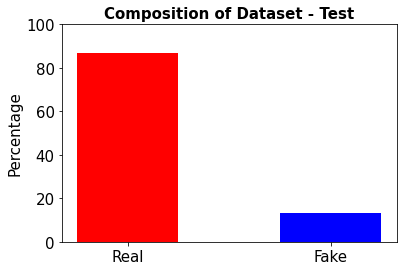

In [ ]:
a,b = train['label'].value_counts()
# print(a)
a,b = test['label'].value_counts()
import matplotlib.pyplot as plt
import datetime
x,y = (a/(a+b)) *100, (b/(a+b)) *100
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(['Real', 'Fake'], [x,y], width=0.5, color=['r','b'], align='center')
ax.set_title("Composition of Dataset - Test", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("Percentage", fontsize = 15)
ax.tick_params(labelsize = 15)
ax.set_ylim(0,100)
fig.savefig('fig2.png',dpi = 100, bbox_inches = 'tight')


In [ ]:
filt = pd.read_csv('datasets/filtered.csv')
filt = filt.dropna()

In [ ]:
train.head()

,ex_id,user_id,prod_id,rating,label,date,review
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...
2,2,925,0,4.0,1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
3,3,926,0,4.0,1,2011-07-28,This is a beautiful quaint little restaurant o...
4,4,927,0,4.0,1,2010-11-01,Snack is great place for a casual sit down lu...


In [ ]:
test.head()

,Unnamed: 0,date,review_id,user_id,product_id,label,useful,funny,cool,rating,review
0,0,7/1/2012,aKwaO7INmxWiLbB7Yms7UQ,bVY3M1faxCL_dgpJOVrQKA,IvdOI86_CSCRFpid2atnyA,0,0,0,0,5,"on the expensive side, but I have been here 3 ..."
1,1,10/12/2011,Di0bJMuQ75srMh3-YA-Q0g,jhJZV8y63oiBr1xcSF0PlQ,O6uWHgJzylSjWjPSJKGhnQ,0,0,0,0,5,Believe the hype. Solid mediterranean food at ...
2,2,10/30/2008,R23ciIIQA0oIKloaMbATmQ,D9ovFFAYDU3S0wROIqnjTw,WBU0yq9J8qiYQfI_fh2P1Q,0,0,0,0,3,Ordered delivery. I had the seoul sassy and a ...
3,3,2/21/2010,vdk7k1y,8_KDi2j9hhY6sdliLY4i1A,OKOfoisduqP24uK3WYvx7Q,0,2,1,2,5,So I actually needed to go here twice before I...
4,4,11/29/2007,ZWJoLePkau60myUwU1hQCw,z-L_18p-ircHFKZzJqaOLg,HOJqzz1WvOmeR9oESJ4d9A,0,1,2,1,5,So much has already been written about Hot Dou...


In [ ]:
print("Training data:   ", train.shape)
print("Validation data: ", val.shape)
print("Test data:       ", test.shape)

Training data:    (250874, 7)
Validation data:  (35918, 7)
Test data:        (61538, 11)


# **TF-IDF Vectorization**

In [ ]:
train_corpus = train['review']
val_corpus = val['review']
test_corpus=test['review']
filt_corpus=filt['review']

In [ ]:
tf = TfidfVectorizer(binary = False, ngram_range = (1,2), stop_words = 'english',min_df=0.01,max_df=0.3)

In [ ]:
#Vectorize trainset
train_tfidf = tf.fit_transform(train_corpus)
print(train_tfidf.shape)
train_features=train_tfidf.toarray()   #convert to numpy array

(250874, 923)


In [ ]:
#Vectorize validation set
val_tfidf=tf.transform(val_corpus)
val_features=val_tfidf.toarray()
val_features.shape

(35918, 923)

In [ ]:
#Vectorize test set
test_tfidf=tf.transform(test_corpus.values.astype('U'))
test_features=test_tfidf.toarray()
test_features.shape

(61538, 923)

In [ ]:
#Vectorize test set
filt_tfidf=tf.transform(filt_corpus.values.astype('U'))
filt_features=filt_tfidf.toarray()
filt_features.shape

(10, 923)

In [ ]:
#Add the ratings column to each of train, validation and test. Normalise the ratings by dividing by 5
X_train=np.c_[train_features,train['rating'].values/5] 
X_val=np.c_[val_features,val['rating'].values/5]
X_test=np.c_[test_features,test['rating'].values/5]
X_filt=np.c_[filt_features,filt['rating'].values/5]

In [ ]:
print(train['label'].value_counts())
print(val['label'].value_counts())
print(test['label'].value_counts())

print(filt['label'].value_counts())

0    225055
1     25819
Name: label, dtype: int64
0    32270
1     3648
Name: label, dtype: int64
0    53397
1     8141
Name: label, dtype: int64
1    5
0    5
Name: label, dtype: int64


In [ ]:
#Ground truth labels for training and validation
y_train = train['label'].values
y_val = val['label'].values
y_test = test['label'].values
y_filt = filt['label'].values

In [ ]:
print("Training data is ", X_train.shape, "and labels are ", y_train.shape)
print("Validation data is ", X_val.shape, "and labels are ", y_val.shape)
print("Test data is ", X_test.shape, "and labels will be predicted by model with ground truth labels as: ", y_test.shape)
print("Filtered data is ", X_filt.shape, "and labels are ", y_filt.shape)

Training data is  (250874, 924) and labels are  (250874,)
Validation data is  (35918, 924) and labels are  (35918,)
Test data is  (61538, 924) and labels will be predicted by model with ground truth labels as:  (61538,)
Filtered data is  (10, 924) and labels are  (10,)


In [ ]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_val.shape

((250874, 924), (61538, 924), (35918, 924), (250874,), (35918,))

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight = 'balanced', 
                                    random_state=42, verbose = 2)
rf.fit(X_train, y_train)
#Can try different number of estimators for hyperparameter tuning

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.6min finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42,
                       verbose=2)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.9s finished


0.6906415476054562
0.1959001338382957


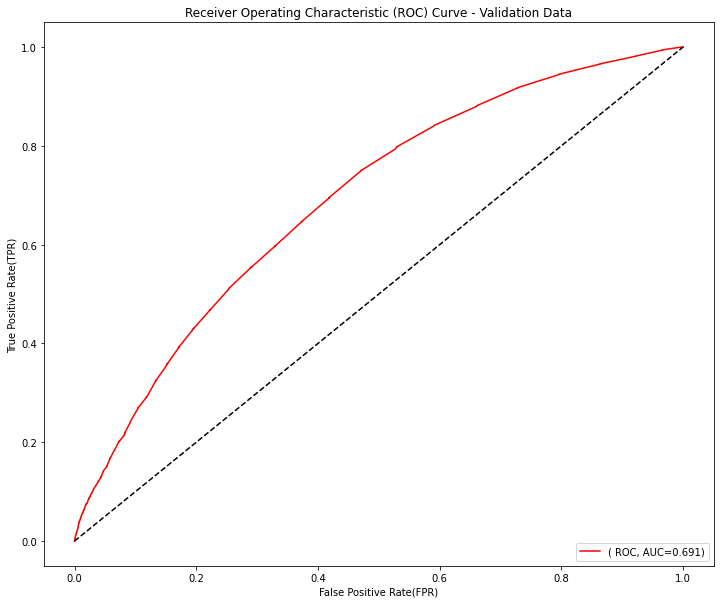

In [ ]:
#Prediction on validation set.
rf_probs = rf.predict_proba(X_val)[:, 1]    
fpr,tpr,threshold = metrics.roc_curve(y_val, rf_probs)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure(figsize=(12 ,10))
plt.plot(fpr, tpr, color='red', label='( ROC, AUC=%0.3f)'%auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Data')
plt.legend(loc=4) #4:lower right legend
average_precision = average_precision_score(y_val, rf_probs)
print(average_precision)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.2s finished


0.6895203146017812
0.23833970751246542


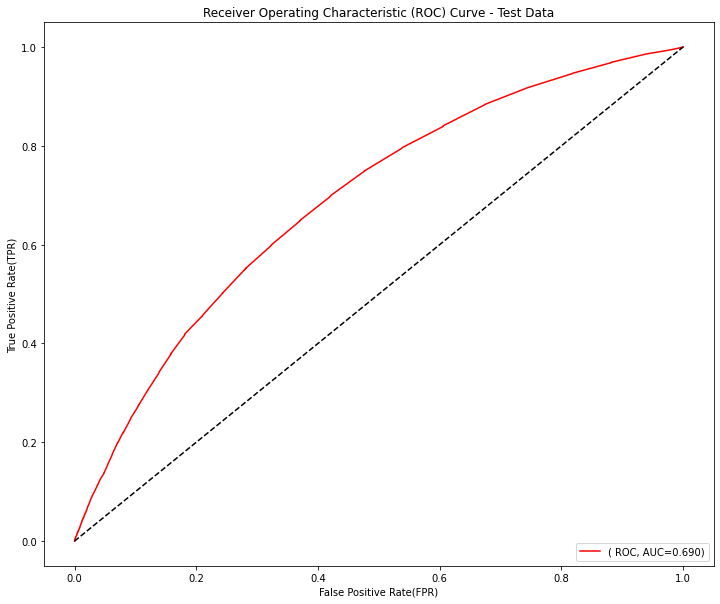

In [ ]:
#Prediction on test set.
rf_probs = rf.predict_proba(X_test)[:, 1]    
fpr,tpr,threshold = metrics.roc_curve(y_test, rf_probs)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure(figsize=(12 ,10))
plt.plot(fpr, tpr, color='red', label='( ROC, AUC=%0.3f)'%auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc=4) #4:lower right legend
average_precision = average_precision_score(y_test, rf_probs)
print(average_precision)


In [ ]:
rf_probs_val = rf.predict(X_val)
rf_probs_test = rf.predict(X_test)
from collections import Counter
from sklearn.metrics import confusion_matrix
import copy


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.2s


        ex_id  user_id  ...                                             review  out
0          11      934  ...  all around good place, cozy, I came in and did...  NaN
18        226     1149  ...  Nice atmosphere and good service. They have a ...  NaN
19        246     1169  ...  Best Pizza in Brooklyn. I tried others and I h...  NaN
36        524     1446  ...  The food was good and the atmosphere very nice...  NaN
37        528     1450  ...  I love this restaurant! My friend booked a tab...  NaN
...       ...      ...  ...                                                ...  ...
35892  358661    27007  ...                    Great atmosphere and good food.  NaN
35893  358674    80019  ...  last night I stopped in and had the best persi...  NaN
35894  358684   161042  ...  Fantastic spot!  Great drinks, great staff.  C...  NaN
35895  358687   161045  ...  I work for a local nonprofit and we were so lu...  NaN
35912  358850   161112  ...  The staff was incredibly nice, the lemonade ta.

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.9s finished


In [ ]:
x__ = copy.deepcopy(val)
x__['out'] = rf_probs_val
x__ = x__[x__['out']==1]
x__ = x__[x__['label']==1]

for i in x__['review']:
  print("FAKE: ", i)

print(confusion_matrix(y_val, rf_probs_val))
print(Counter(rf_probs_val))
print(Counter(y_val))
one = y_val[y_val==rf_probs_val]
one_ = one[one==1]
zero = one[one==0]
print(len(one_), len(zero))

FAKE:  Great food for great value!
FAKE:  Food - excellent, service - excellent
FAKE:  The owner chef should be embarrassed . Really not good.
FAKE:  Amo essere coccolata.. Soprattutto quando viaggio, ho mangiato benissimo e da buona italiana, lo consiglio vivamente. E anche se siamo arrivati a chiusura cucina sono stati molto gentili e disponibili.. ottimo vino. Si può cenare anche su un Bellissimo tavolo all'americana..Assolutamente consigliato.
FAKE:  Overpriced.  Food was not good.  Owner was arrogant and rude.  Felt bad for the staff.
FAKE:  Arepas are top notch and the service was outstanding.
FAKE:  It's a good one!
FAKE:  good coffee
FAKE:  very very good
FAKE:  As good as it looks . Yummy!
FAKE:  the perfect spot for ramen on a cold day. Excellent choices. I suggest adding an egg into whatever you're getting. Hot sauces available for anyone who needs it spicy. Vegetarian options are delicious as well. There will be a wait - it is worth it. Super casual environment.
FAKE:  the 

In [ ]:
print(type(rf_probs_val), type(X_val))
all_data = np.append(X_val, new_col, 1)
x__['out'] = pd.DataFrame(rf_probs_val)

In [ ]:
print("Validation Accuracy: ", accuracy_score(y_val, rf_probs_val))
print("Test Accuracy: ", accuracy_score(y_test, rf_probs_test))

In [ ]:
rf_probs_filt_ = rf.predict(X_filt)
rf_probs_filt = rf.predict_proba(X_filt)[:, 1]
print("Filtered Data predictions: ", rf_probs_filt_)
print("Filtered Data probabilities: ", rf_probs_filt)

In [ ]:
print(X_filt)

[[0.  0.  0.  ... 0.  0.  1. ]
 [0.  0.  0.  ... 0.  0.  0.8]
 [0.  0.  0.  ... 0.  0.  1. ]
 ...
 [0.  0.  0.  ... 0.  0.  0.8]
 [0.  0.  0.  ... 0.  0.  0.8]
 [0.  0.  0.  ... 0.  0.  1. ]]


In [ ]:
# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    # print(np.mean(X[Y==0, :]))
    out1 = []
    # for c in set(Y):
    arr = []
    for c in set(Y):
      for a,b in zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances):
        arr.append([a,b])
      arr = sorted(arr, key=lambda x:x[1], reverse=True)
      out1.append(arr)
      # print("KK", arr)
    return out1[0], out1[1]

      # out[c] = dict(
      #     zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances)
      # )

    # return out 
from sklearn.preprocessing import scale
importances = rf.feature_importances_
print(len(importances))
indices = np.argsort(importances)[::-1]

real,fake = class_feature_importance(X_train, y_train, importances)
top_k = 30


924


[[923, 0.00015453087543005034], [338, 0.00011379477253868544], [617, 0.00010743642643838437], [692, 9.86281194361034e-05], [416, 8.984900180548252e-05], [557, 8.331029899364053e-05], [608, 8.298571210589849e-05], [105, 7.953474184540481e-05], [440, 7.326692580587982e-05], [860, 6.555507964002273e-05], [640, 5.984459130944107e-05], [447, 5.0544193397924576e-05], [200, 4.996142207360006e-05], [115, 4.931576093215208e-05], [307, 4.83636653547353e-05], [138, 4.53623374110473e-05], [118, 4.4450415179442613e-05], [188, 4.39830836510963e-05], [72, 4.381771950909086e-05], [791, 4.2323934472837965e-05], [885, 3.881441237735098e-05], [755, 3.615891357627911e-05], [215, 3.615421704655318e-05], [92, 3.485898662974212e-05], [288, 3.332599324669211e-05], [817, 3.0978507107663635e-05], [741, 3.002477886740604e-05], [806, 2.9281204323383282e-05], [665, 2.9228822361941817e-05], [623, 2.8938719018507192e-05], [556, 2.8278736052089463e-05], [490, 2.5716762028119793e-05], [210, 2.5063770146427548e-05], [1

<BarContainer object of 30 artists>

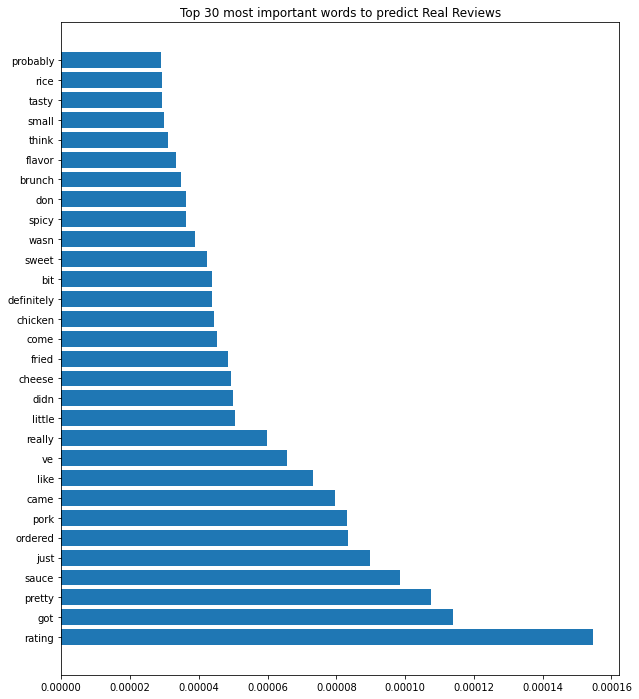

In [ ]:
names = tf.get_feature_names_out()
names = np.append(names,'rating')
plt.figure(figsize=(10,12))
# sorted_idx = rf.feature_importances_.argsort()
# print(rf.feature_importances_[sorted_idx])
# y = []
plt.title("Top 30 most important words to predict Real Reviews")
x,y = [],[]
top_k = 30
print(real)
for i in range(top_k):
  x.append(names[real[i][0]])
  y.append(real[i][1])
  # print(result[i][0])
  # print(names[result[i][0]])
# for i in sorted_idx:
#   y.append(str(i))
  
# for i in sorted_idx:
#   print(rf.feature_importances_[i])
plt.barh(x,y)


[[716, 0.0010664438874955027], [67, 0.0007745685088080401], [763, 0.0006707826562278415], [466, 0.0005794285216179906], [659, 0.0003602945816087614], [37, 0.00033846472402797], [593, 0.000300179228831296], [21, 0.00028172682536023913], [248, 0.00021737369691608225], [341, 0.00020850110282261036], [295, 0.0001945088860765288], [310, 0.0001677597698361265], [904, 0.00015925179261714912], [467, 0.0001545784597540354], [923, 0.00015453087543005034], [255, 0.00012688511676024137], [568, 0.00012441014055414063], [294, 0.00012345463594470589], [524, 0.00012073198803808576], [676, 0.00012053636562479459], [481, 0.00012029177888142318], [649, 0.0001198556972062322], [338, 0.00011379477253868544], [617, 0.00010743642643838437], [692, 9.86281194361034e-05], [342, 9.707743401533975e-05], [334, 9.371876060481218e-05], [523, 9.367699705033128e-05], [416, 8.984900180548252e-05], [557, 8.331029899364053e-05], [608, 8.298571210589849e-05], [105, 7.953474184540481e-05], [264, 7.33474091992127e-05], [440

Text(0.5, 1.0, 'Top 30 most important words to predict Fake Reviews')

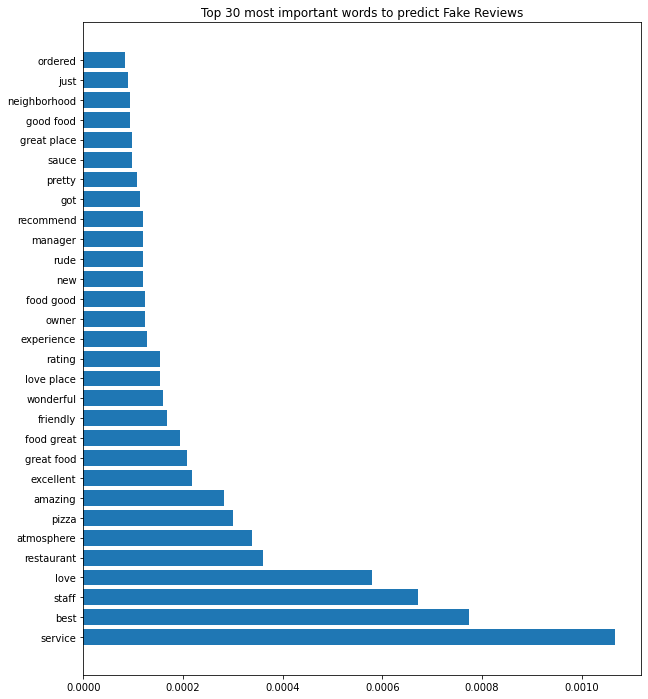

In [ ]:
x,y = [],[]
top_k = 30
print(fake)
plt.figure(figsize=(10,12))
for i in range(top_k):
  x.append(names[fake[i][0]])
  y.append(fake[i][1])
  # print(result[i][0])
  # print(names[result[i][0]])
# for i in sorted_idx:
#   y.append(str(i))
  
# for i in sorted_idx:
#   print(rf.feature_importances_[i])
plt.barh(x,y)
plt.title("Top 30 most important words to predict Fake Reviews")

[[716, 0.0010664438874955027], [67, 0.0007745685088080401], [763, 0.0006707826562278415], [466, 0.0005794285216179906], [659, 0.0003602945816087614], [37, 0.00033846472402797], [593, 0.000300179228831296], [21, 0.00028172682536023913], [248, 0.00021737369691608225], [341, 0.00020850110282261036], [295, 0.0001945088860765288], [310, 0.0001677597698361265], [904, 0.00015925179261714912], [467, 0.0001545784597540354], [923, 0.00015453087543005034], [255, 0.00012688511676024137], [568, 0.00012441014055414063], [294, 0.00012345463594470589], [524, 0.00012073198803808576], [676, 0.00012053636562479459], [481, 0.00012029177888142318], [649, 0.0001198556972062322], [338, 0.00011379477253868544], [617, 0.00010743642643838437], [692, 9.86281194361034e-05], [342, 9.707743401533975e-05], [334, 9.371876060481218e-05], [523, 9.367699705033128e-05], [416, 8.984900180548252e-05], [557, 8.331029899364053e-05], [608, 8.298571210589849e-05], [105, 7.953474184540481e-05], [264, 7.33474091992127e-05], [440

Text(0.5, 1.0, 'Top 20 feature importance comparison of Fake vs Real Reviews')

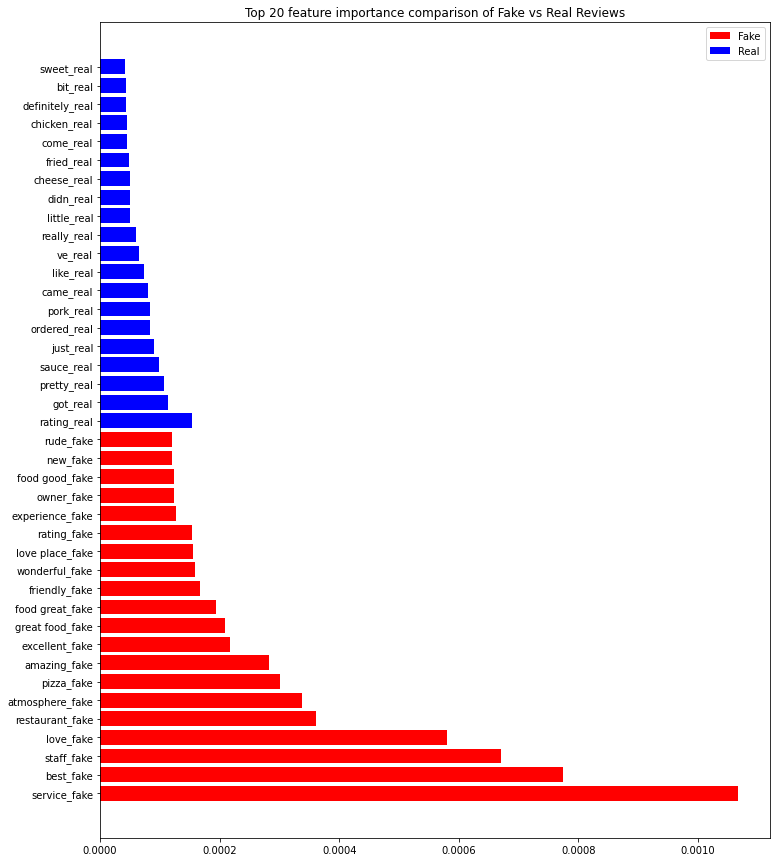

In [ ]:
names = tf.get_feature_names_out()
names = np.append(names,'rating')
plt.figure(figsize=(12,15))
# sorted_idx = rf.feature_importances_.argsort()
# print(rf.feature_importances_[sorted_idx])
# y = []

x,y = [],[]
top_k = 20
print(fake)
for i in range(top_k):
  x.append(names[fake[i][0]]+"_fake")
  y.append(fake[i][1])
  # print(result[i][0])
  # print(names[result[i][0]])
# for i in sorted_idx:
#   y.append(str(i))
  
# for i in sorted_idx:
#   print(rf.feature_importances_[i])
plt.barh(x,y, color = 'red', label = "Fake")




x,y = [],[]
top_k = 20
print(real)
for i in range(top_k):
  x.append(names[real[i][0]]+"_real")
  y.append(real[i][1])
  # print(result[i][0])
  # print(names[result[i][0]])
# for i in sorted_idx:
#   y.append(str(i))
  
# for i in sorted_idx:
#   print(rf.feature_importances_[i])
# colors = {'Fake':'red', 'Real':'blue'}
plt.barh(x,y, color = 'blue',label="Real")
plt.legend()
# plt.barh(names[-top_k:], rf.feature_importances_[sorted_idx][-top_k:])
# plt.xlabel("Random Forest Feature Importance")
# plt.ylabel("Features")
# print(rf.feature_importances_[sorted_idx][-top_k:], names[-top_k:])
# plt.legend("Real", "Fake")
plt.title("Top 20 feature importance comparison of Fake vs Real Reviews")

#Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
X_train.shape

(135033, 924)

In [ ]:
data  = X_train
# to_model_columns = data.columns[0:]
# data = data[to_model_columns]
X = np.expand_dims(data, axis=1)
print(X.shape)
X = np.squeeze(X)
print(X.shape)
y_true = np.expand_dims(y_train, axis=1)
print(y_true.shape)
y_true = np.squeeze(y_true)
print(y_true.shape)

(135033, 1, 924)
(135033, 924)
(135033, 1)
(135033,)


In [ ]:
transformer_IF = IsolationForest(contamination=0.3)
transformer_IF.fit(X)

IsolationForest(contamination=0.3)

In [ ]:
prediction_labels_IF = transformer_IF.predict(X)
# prediction_score_IF = transformer_IF.predict_score(X)

In [ ]:
y_pred = prediction_labels_IF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:

from collections import  Counter
# print(Counter(y_pred))
import copy
y_pred1 = copy.deepcopy(y_pred)
y_pred1[y_pred1==1] = 0
y_pred1[y_pred1==-1] = 1
print(Counter(y_pred1))

print('Accuracy Score: ', accuracy_score(y_true, y_pred1))

confusion_matrix(y_true, y_pred1)

print(classification_report(y_true, y_pred1))

Counter({0: 94523, 1: 40510})
Accuracy Score:  0.4636200039990225
              precision    recall  f1-score   support

           0       0.59      0.62      0.61     90022
           1       0.16      0.15      0.15     45011

    accuracy                           0.46    135033
   macro avg       0.38      0.38      0.38    135033
weighted avg       0.45      0.46      0.46    135033



In [ ]:
metric = -(transformer_IF.score_samples(X_test)) # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest.score_samples
# print(metric)
# print(roc_auc_score(y_test, metric))

In [ ]:
prediction_labels_IF = transformer_IF.predict(X_filt)

y_pred1 = prediction_labels_IF
y_pred1[y_pred1==1] = 0
y_pred1[y_pred1==-1] = 1
print(y_pred1)
print('Accuracy Score: ', accuracy_score(y_filt, y_pred1))

confusion_matrix(y_filt, y_pred1)

print(classification_report(y_filt, y_pred1))

[0 0 0 1 0 0 0 0 1 0]
Accuracy Score:  0.5
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.50      0.20      0.29         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10



# Naive Bayes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#Validation Set
bnb_tv = BernoulliNB().fit(X_train,y_train).predict_proba(X_val)
fpr_bnb_tv, tpr_bnb_tv, thresholds_bnb_tv = metrics.roc_curve(y_val, bnb_tv[:,1])
roc_auc_bnb_tv = metrics.auc(fpr_bnb_tv, tpr_bnb_tv)
roc_auc_bnb_tv

0.6711586959535498

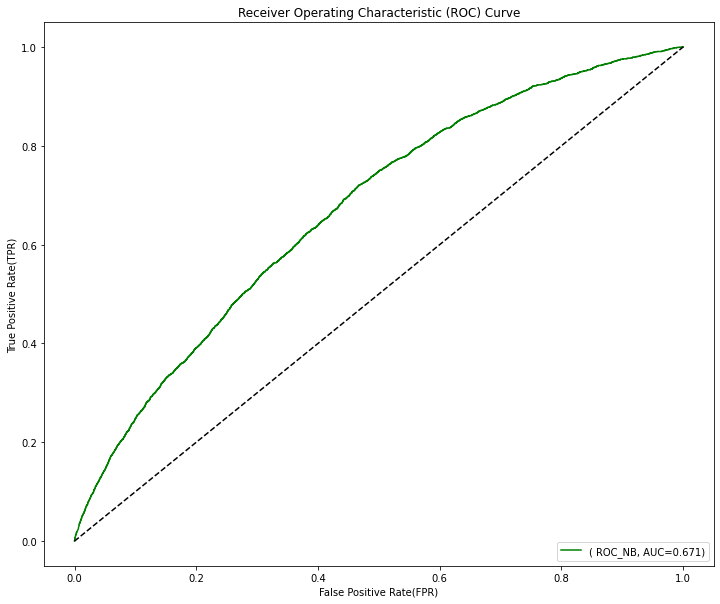

In [ ]:
plt.figure(figsize=(12 ,10))
#plt.plot(fpr, tpr, color='red', label='( ROC_LR, AUC=%0.3f)'%auc)
plt.plot(fpr_bnb_tv, tpr_bnb_tv, color='Green', label='( ROC_NB, AUC=%0.3f)'%roc_auc_bnb_tv)

plt.plot([0, 1], [0, 1], color='Black', linestyle='--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4) #4:lower right legend

In [ ]:
#Test set
bnb_tv = BernoulliNB().fit(X_train,y_train).predict_proba(X_test)
fpr_bnb_tv, tpr_bnb_tv, thresholds_bnb_tv = metrics.roc_curve(y_test, bnb_tv[:,1])
roc_auc_bnb_tv = metrics.auc(fpr_bnb_tv, tpr_bnb_tv)
roc_auc_bnb_tv

0.6702675893218495

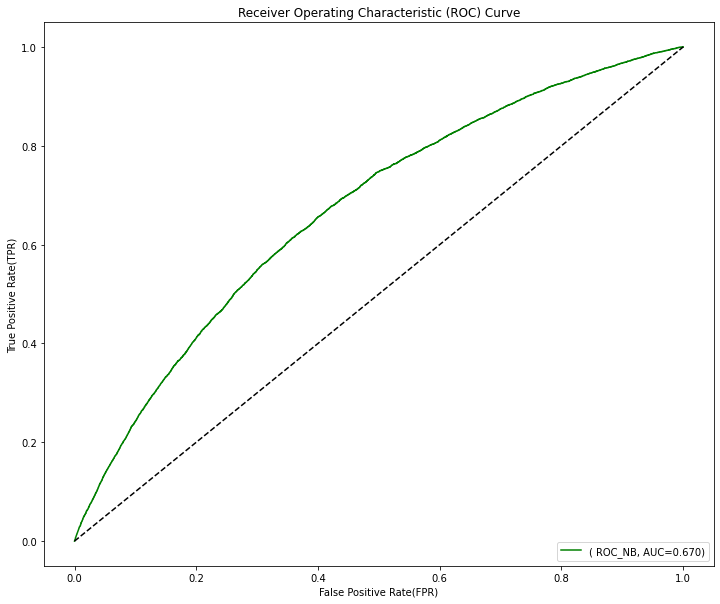

In [ ]:
plt.figure(figsize=(12 ,10))
#plt.plot(fpr, tpr, color='red', label='( ROC_LR, AUC=%0.3f)'%auc)
plt.plot(fpr_bnb_tv, tpr_bnb_tv, color='Green', label='( ROC_NB, AUC=%0.3f)'%roc_auc_bnb_tv)

plt.plot([0, 1], [0, 1], color='Black', linestyle='--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4) #4:lower right legend

In [ ]:
bnb_tv_val = BernoulliNB().fit(X_train,y_train).predict(X_val)
bnb_tv_test = BernoulliNB().fit(X_train,y_train).predict(X_test)


In [ ]:
bnb_tv_filt = BernoulliNB().fit(X_train,y_train).predict(X_filt)

In [ ]:
print("Validation Accuracy: ", accuracy_score(y_val, bnb_tv_val))
print("Test Accuracy: ", accuracy_score(y_test, bnb_tv_test))
print("Filtered Accuracy: ", accuracy_score(y_filt, bnb_tv_filt))

Validation Accuracy:  0.6128681997884069
Test Accuracy:  0.6499236244271832
Filtered Accuracy:  0.4


In [ ]:
print("Filtered Predictions: ", bnb_tv_filt)

[1 1 1 0 1 1 1 1 1 1]


# SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [ ]:
X_train, y_train = pipeline.fit_resample(X_train, y_train)
X_val, y_val = pipeline.fit_resample(X_val, y_val)
X_test, y_test = pipeline.fit_resample(X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

In [ ]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [ ]:
X_full=np.r_[X_train,X_val]
X_full.shape
y_full=np.r_[y_train,y_val]
y_full.shape

(154395,)

# Logistic Regression

In [ ]:
warnings.filterwarnings('ignore')
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,scoring='roc_auc')
logreg_cv.fit(X_full,y_full)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.781003897183517


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.781003897183517


In [ ]:
warnings.filterwarnings('ignore')

clf_lr_w= LogisticRegression(penalty='l2',C=0.1,class_weight='balanced') 
clf_lr_w.fit(X_train,y_train)
probs_w = clf_lr_w.predict_proba(X_val)[:,1]  # probability for label=1
fpr_w,tpr_w,threshold_w = metrics.roc_curve(y_val, probs_w)
auc_w = metrics.auc(fpr_w,tpr_w)
auc_w


0.784573342043797

In [ ]:
y1 = clf_lr_w.predict(X_val)
accuracy_score(y_val, y1)

0.7061254002685673

In [ ]:
y1_filt = clf_lr_w.predict(X_filt)
accuracy_score(y_filt, y1_filt)
print("Filtered Predictions: ", y1_filt)

Filtered Predictions:  [1 1 1 0 1 1 1 1 0 1]


In [ ]:
p = clf_lr_w.predict_proba(X_train)[:,1]  # probability for label=1
f,t,thres = metrics.roc_curve(y_train, p)
auc_train = metrics.auc(f,t)
auc_train

0.7934619525472011

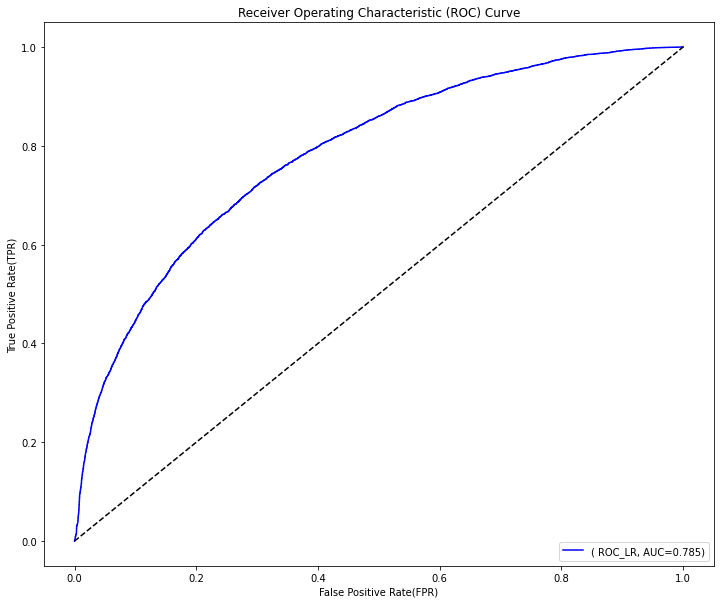

In [ ]:
plt.figure(figsize=(12 ,10))
#plt.plot(fpr, tpr, color='red', label='( ROC_LR, AUC=%0.3f)'%auc)
plt.plot(fpr_w, tpr_w, color='blue', label='( ROC_LR, AUC=%0.3f)'%auc_w)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4) #4:lower right legend

In [ ]:
probs_w = clf_lr_w.predict_proba(X_val)[:,1]  # probability for label=1
fpr_w,tpr_w,threshold_w = metrics.roc_curve(y_val, probs_w)
auc_w = metrics.auc(fpr_w,tpr_w)
auc_w

0.784573342043797

In [ ]:
probs_w = clf_lr_w.predict_proba(X_test)[:,1]  # probability for label=1
fpr_w,tpr_w,threshold_w = metrics.roc_curve(y_test, probs_w)
auc_w = metrics.auc(fpr_w,tpr_w)
auc_w

0.7500919077018948

In [ ]:
y2 = clf_lr_w.predict(X_test)
accuracy_score(y_test, y2)

0.6876736273683554